# U18CST7002 - MACHINE LEARNING TECHNIQUES

# Assignment - 2

## Creating and Visualising a Decision Tree Regression Model in Machine Learning Using Python - PPT.

### 18BCS027 - Lokesh Kumar
### 18BCS068 - Shivali Muthukumar
### 18BCS073 - Varshini
### 18BCS091 - Shalini
### 18BCS093 - Kritya Shree

## 

## Dataset Chosen: Employee Details
### Attributes

#### Satisfactory Levels - satisfaction level at job of an employee
#### Last Evaluation - Rating between 0 to 1, received by an employee at his last evaluation
#### Number of Projects - Number of projects, an employee involved in
#### Average Monthly Hour - Average number of hours in a month, spent by an employee at office
#### Year Spent in Company - Number of years spent in the company
#### Work Accidents - 0 - no accident during employee stay, 1 - accident during employee stay
#### Left - 0 indicates employee stays in the company, 1 indicates - employee left the company
#### Promotion last 5 years - Number of promotions in his stay
#### Department - Department
#### Salary - Salary; Low, Medium, High


### 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly as ply
import plotly.express as px

In [2]:
dataset = pd.read_csv('/Users/kritya/Desktop/employee.csv')
dataset.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2232,0.56,0.62,3,154,2,0,0,0,sales,low
2233,0.70,0.89,6,214,2,0,0,0,sales,low
2234,0.90,0.64,4,209,4,0,0,0,sales,low
2235,0.15,0.74,6,212,2,0,0,0,sales,low
2236,0.39,0.36,3,168,3,1,0,0,sales,low


In [3]:
dataset.shape

(2237, 10)

In [4]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,0.462517,0.720022,3.869468,206.767546,3.803308,0.063031,0.894055,0.003576
std,0.269091,0.194023,1.749506,59.915680,1.005676,0.243073,0.307837,0.059708
min,0.090000,0.360000,2.000000,100.000000,2.000000,0.000000,0.000000,0.000000
25%,0.290000,0.520000,2.000000,147.000000,3.000000,0.000000,1.000000,0.000000
50%,0.420000,0.780000,4.000000,220.000000,4.000000,0.000000,1.000000,0.000000
75%,0.740000,0.900000,5.000000,260.000000,5.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.000000


# 

## Pre-Processing

In [5]:
data = dataset.copy()
data.shape

(2237, 10)

In [6]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# 

## Visualisation

## Heatmap to find correlation

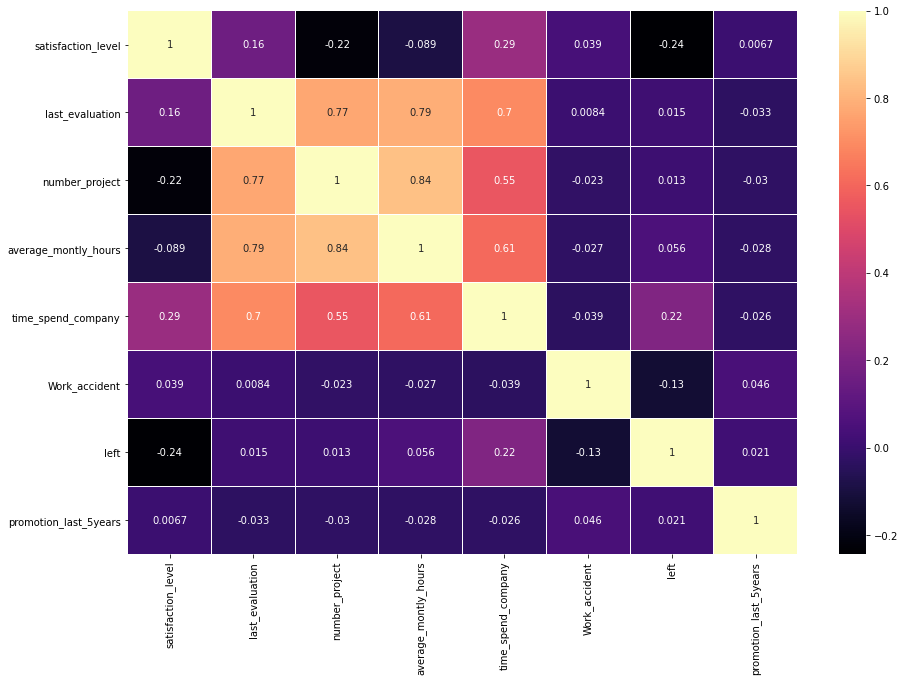

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, cmap="magma")
plt.show()


### The attributes which have correlation less than zero with the attribute 'left' is removed.

In [8]:
df=data.drop(['satisfaction_level', 'Work_accident', 'salary'],axis=1)
print(df.shape)

(2237, 7)


In [9]:
df

,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department
0,0.53,2,157,3,1,0,sales
1,0.86,5,262,6,1,0,sales
2,0.88,7,272,4,1,0,sales
3,0.87,5,223,5,1,0,sales
4,0.52,2,159,3,1,0,sales
...,...,...,...,...,...,...,...
2232,0.62,3,154,2,0,0,sales
2233,0.89,6,214,2,0,0,sales
2234,0.64,4,209,4,0,0,sales
2235,0.74,6,212,2,0,0,sales


## No. of years spent in company VS Employees leaving the company

/Users/kritya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


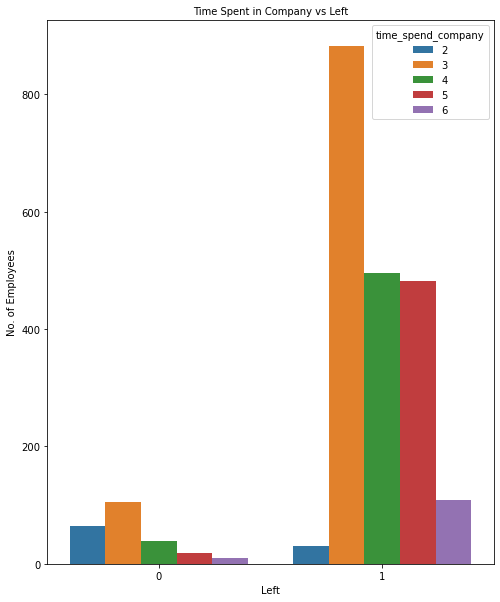

In [10]:
plt.subplots(figsize=(8,10))
b = sns.countplot('left',hue='time_spend_company', data=df)
b.axes.set_title('Time Spent in Company vs Left',fontsize=10)
b.set_xlabel("Left",fontsize=10)
b.set_ylabel("No. of Employees",fontsize=10)
plt.show()

## No. of Employees in each department

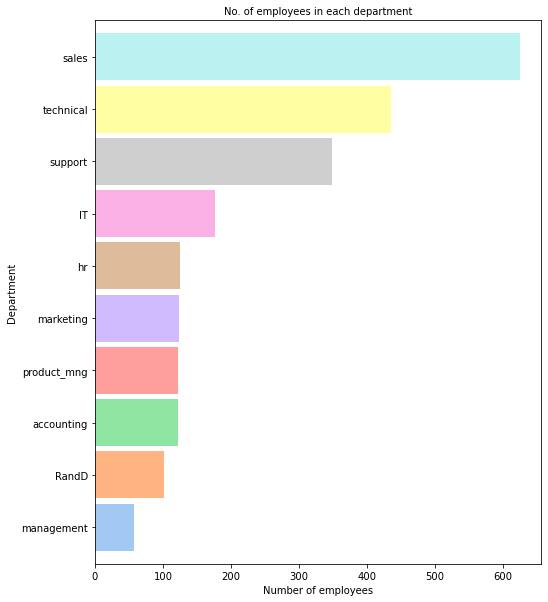

In [12]:
plt.subplots(figsize=(8,10))
grade_counts = df['Department'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('pastel',40))
grade_counts.axes.set_title('No. of employees in each department',fontsize=10)
grade_counts.set_xlabel('Number of employees', fontsize=10)
grade_counts.set_ylabel('Department', fontsize=10)
plt.show()

## Project Distribution

/Users/kritya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


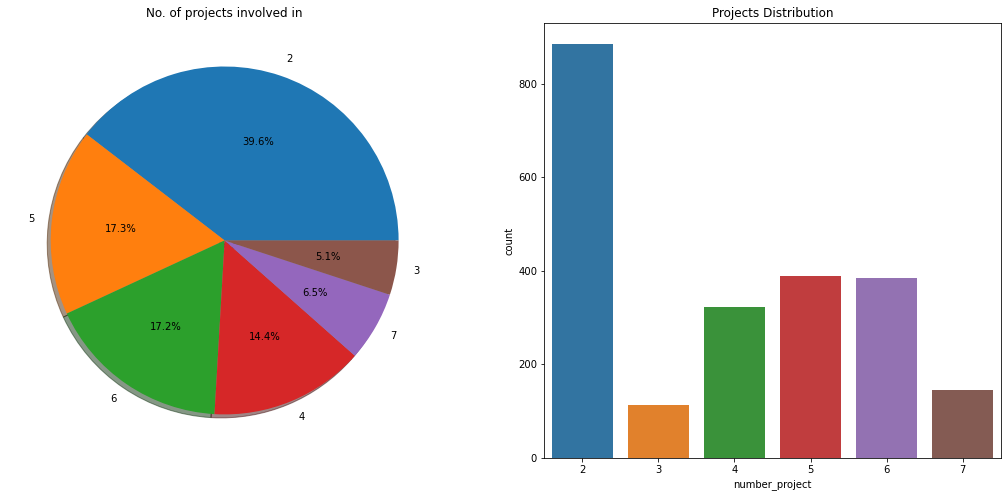

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['number_project'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('No. of projects involved in')
ax[0].set_ylabel('')
sns.countplot('number_project',data=df,ax=ax[1])
ax[1].set_title('Projects Distribution')
plt.show()

## Last Evaluation and Monthly hours Distribution

Text(0, 0.5, 'Employee Count')

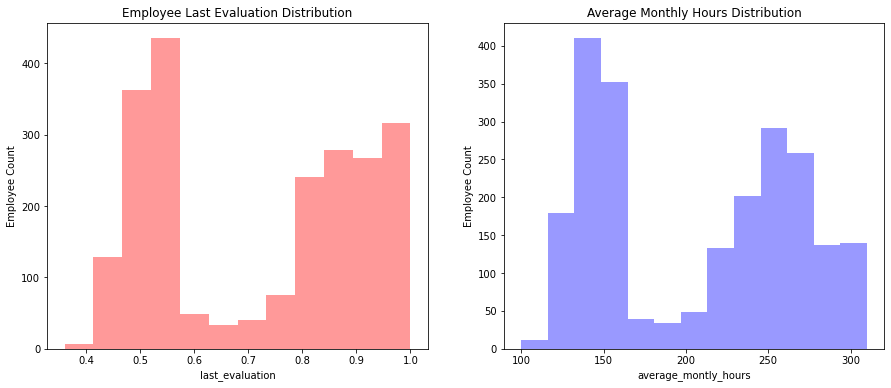

In [26]:
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

sns.distplot(df.last_evaluation, kde=False, color="r", ax=axes[0]).set_title('Employee Last Evaluation Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.average_montly_hours, kde=False, color="b", ax=axes[1]).set_title('Average Monthly Hours Distribution')
axes[1].set_ylabel('Employee Count')

## 

## Developing Decision Tree Regression Model

## Label Encoding

In [15]:
label_encoder = preprocessing.LabelEncoder()
df['Department']= label_encoder.fit_transform(df['Department'])
df

,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department
0,0.53,2,157,3,1,0,7
1,0.86,5,262,6,1,0,7
2,0.88,7,272,4,1,0,7
3,0.87,5,223,5,1,0,7
4,0.52,2,159,3,1,0,7
...,...,...,...,...,...,...,...
2232,0.62,3,154,2,0,0,7
2233,0.89,6,214,2,0,0,7
2234,0.64,4,209,4,0,0,7
2235,0.74,6,212,2,0,0,7


## Divide into training and testing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

In [17]:
X=df.drop(['left'],axis=1)
print(X.shape)
y=df['left']
print(y.shape)

(2237, 6)
(2237,)


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=342)
print(X_train.shape)
print(X_test.shape)

(1677, 6)
(560, 6)


## 

## Decision Tree

In [19]:
DT = DecisionTreeRegressor(criterion="mse", random_state=893, max_depth=3, min_samples_leaf=1)

DT = DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)

In [20]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.2689098362244503

## 

In [21]:
X.columns

Index(['last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'promotion_last_5years', 'Department'],
      dtype='object')

In [22]:
X_columns = ['last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'promotion_last_5years', 'Department']

## Graph

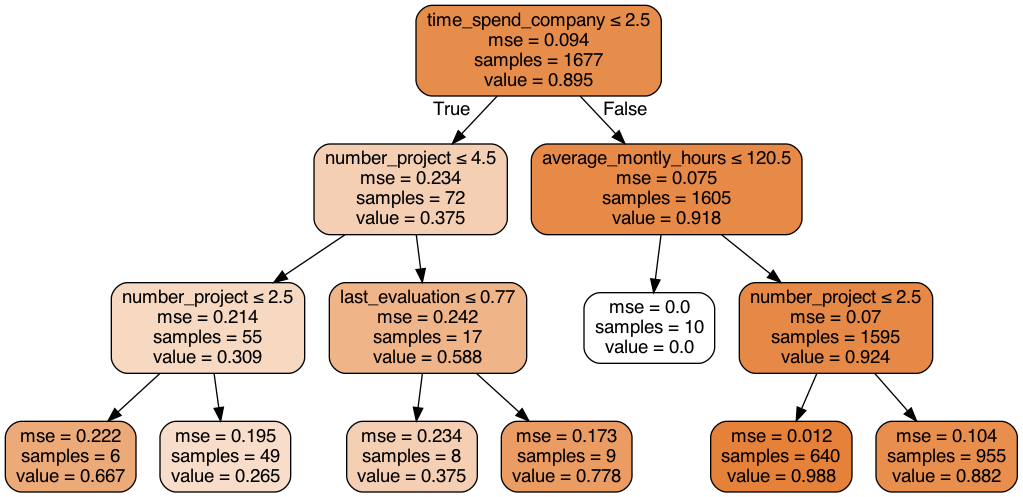

In [23]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision Tree')
Image(graph.create_png())